In [1]:
%pip install opencv-python numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 20.7 MB/s eta 0:00:00


In [2]:
import os, cv2, numpy as np, pandas as pd, matplotlib

Note: using dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

In [3]:
!curl -L -o tbc.zip https://www.kaggle.com/api/v1/datasets/download/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  663M  100  663M    0     0   207M      0  0:00:03  0:00:03 --:--:--  249M


In [4]:
!unzip -oq tbc.zip

In [5]:
def get_dataset():
    path_normal = "TB_Chest_Radiography_Database/Normal"
    path_tb = "TB_Chest_Radiography_Database/Tuberculosis"
    x_normal=[]
    x_tb=[]
    for img in os.listdir(path_normal):
        x_normal.append(cv2.imread(os.path.join(path_normal, img)))

    for img in os.listdir(path_tb):
        image = cv2.imread(os.path.join(path_tb, img))
        if image.shape != (512, 512, 3):
            continue
        x_tb.append(image)

    return x_normal, x_tb


In [6]:
x_normal, x_tb = get_dataset()
# x_tb=x_tb[x_tb != None]

In [7]:
x_normal[0].shape

(512, 512, 3)

In [8]:
# x_tb

In [9]:
x_tb[0].shape

(512, 512, 3)

In [10]:
from matplotlib import pyplot

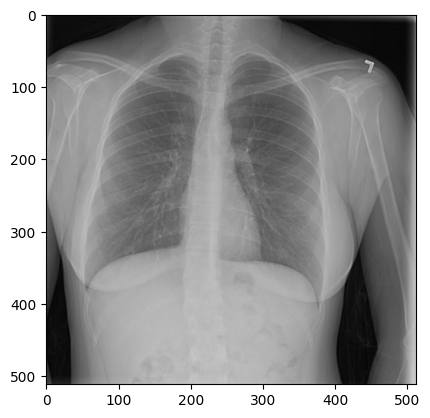

In [11]:
pyplot.imshow(x_normal[0])

In [12]:
# np.array(x_normal,dtype=np.float32)

In [13]:
def segment(source):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    k = 4

    image = np.array(source,dtype=np.float32)
    pixel_values = np.array(image.reshape((-1, 3)) if len(image.shape) == 3 else image.reshape((-1, 1)))
    pixel_values = np.float32(pixel_values)

    retval, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)


    centers = np.uint8(centers)

    segmented_data = centers[labels.flatten()]

    segmented_image = segmented_data.reshape((image.shape))
    return segmented_image


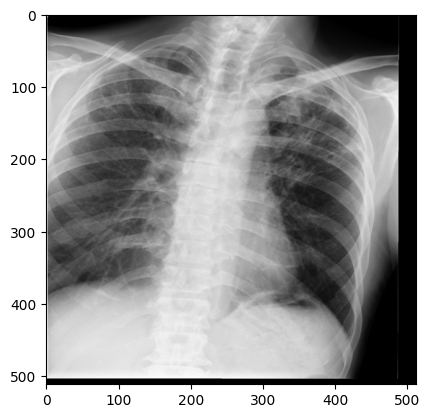

In [14]:
pyplot.imshow(x_tb[0])

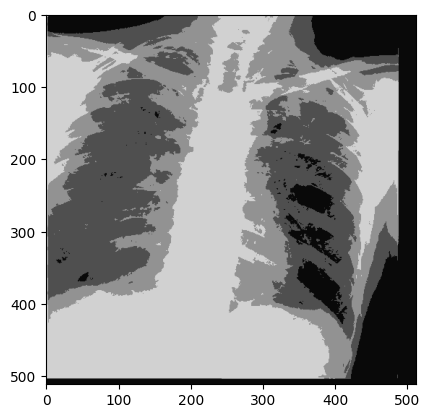

In [15]:
pyplot.imshow(segment(x_tb[0]))

In [16]:
np.array(x_tb).shape

(700, 512, 512, 3)

In [17]:
x=[segment(x) for x in x_normal[:700]]
y=["normal"]*len(x_normal[:700])
x=x+[segment(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

In [18]:
%pip install scikit-learn

In [19]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en


from sklearn.svm import SVC

In [20]:
dict["x"].shape

(1400, 512, 512, 3)

In [21]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2]*dict["x"].shape[3])


In [22]:
# X_reshaped

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42,
                                   test_size=0.2,
                                   shuffle=True)

In [24]:
X_train.shape

(1120, 786432)

In [25]:
y_train.shape

(1120,)

In [26]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [27]:
# clf = RandomForestClassifier(max_depth=2, random_state=42, verbose=True)

In [28]:
X_train

array([[  4,   4,   4, ...,   4,   4,   4],
       [193, 193, 193, ...,  71,  71,  71],
       [117, 117, 117, ...,   9,   9,   9],
       ...,
       [  6,   6,   6, ...,   6,   6,   6],
       [ 54,  51,  43, ...,  54,  51,  43],
       [189, 189, 189, ..., 189, 189, 189]], dtype=uint8)

In [29]:
X_test

array([[210, 210, 210, ...,  74,  74,  74],
       [139, 139, 139, ...,  76,  76,  76],
       [ 27,  27,  27, ...,  94,  94,  94],
       ...,
       [ 18,  18,  18, ...,  18,  18,  18],
       [ 11,  11,  11, ...,  11,  11,  11],
       [ 41,  41,  41, ..., 110, 110, 110]], dtype=uint8)

In [30]:
model.fit(X_train, y_train)

SVC(random_state=42)

In [31]:
result = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
# trainres =model.predict(X_train)

In [34]:
# accuracy_score(y_train, trainres)

In [35]:
accuracy_score(y_test, result)

0.975